# Multiple Linear Regression

In [420]:
import pandas as pd

In [421]:
path_to_file = './petrol_consumption.csv'
df = pd.read_csv(path_to_file)

In [422]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [423]:
df.shape

(48, 5)

In [424]:
#descriptive statistics of this data

print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


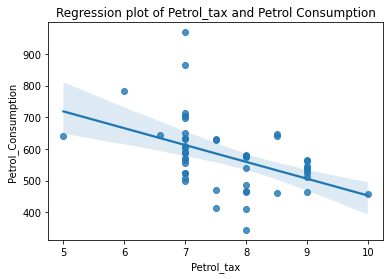

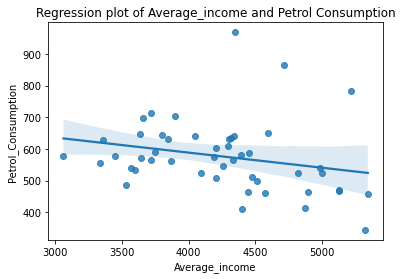

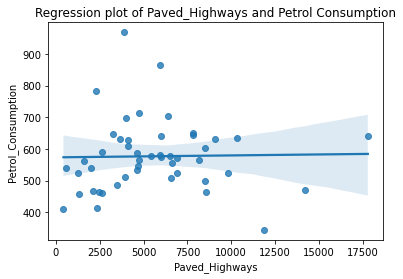

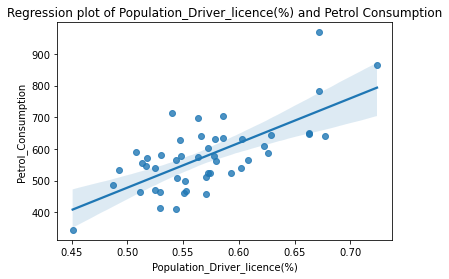

In [425]:
import seaborn as sns # Convention alias for Seaborn
import matplotlib.pyplot as plt

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');


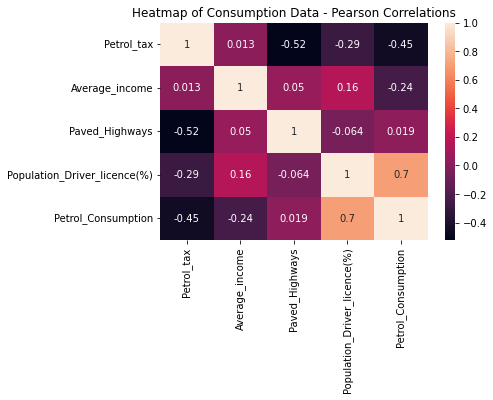

In [426]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');


In [427]:
#Dataset for the model

y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [428]:
#Splitting train and testing data

from sklearn.model_selection import train_test_split
SEED = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [429]:
#Fit data to the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [430]:
regressor.intercept_

361.4508790666836

In [431]:
print(regressor.coef_)
print(X.columns)

[-5.65355145e-02 -4.38217137e-03  1.34686930e+03 -3.69937459e+01]
Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')


In [432]:
#Better representaions of coef

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

print(coefficients_df)

                              Coefficient value
Average_income                        -0.056536
Paved_Highways                        -0.004382
Population_Driver_licence(%)        1346.869298
Petrol_tax                           -36.993746


In [433]:
#Model predections

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


In [434]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


In [435]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.3913664001430537


In [436]:
#Train Error
regressor.score(X_train, y_train)

0.7068781342155135

In [437]:
#Test Error
regressor.score(X_test, y_test)

0.3913664001430538

### For all variable can get 70.68% train accuarcy and 39.13% testing accuracy. Which shows that model is overfitted

# Removing Average_income variable

In [438]:
#Dataset for the model

y = df['Petrol_Consumption']
X = df[['Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [439]:
#Splitting train and testing data

SEED = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [440]:
#Fit data to the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [441]:
regressor.intercept_

278.9451691960404

In [442]:
#Better representaions of coef

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

print(coefficients_df)

                              Coefficient value
Paved_Highways                        -0.006526
Population_Driver_licence(%)        1202.432552
Petrol_tax                           -45.428979


In [443]:
#Model predections

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  575.307626
40     587  683.392740
26     577  539.214550
43     591  554.739657
24     460  538.248584
37     704  623.901704
12     525  605.916050
19     640  667.626706
4      410  566.824103
25     566  493.237071


In [444]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 72.26
Mean squared error: 6487.32
Root mean squared error: 80.54


In [445]:
#Train Error
regressor.score(X_train, y_train)

0.6286735791896659

In [446]:
#Test Error
regressor.score(X_test, y_test)

0.03302608023047027

### By removing Average_income we can get 62.86% train accuarcy and 3.30% testing accuracy.

# Removing Paved_Highways variable

In [447]:
#Dataset for the model

y = df['Petrol_Consumption']
X = df[['Average_income',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [448]:
#Splitting train and testing data

SEED = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [449]:
#Fit data to the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [450]:
regressor.intercept_

205.39240676596557

In [451]:
#Better representaions of coef

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

print(coefficients_df)

                              Coefficient value
Average_income                        -0.060255
Population_Driver_licence(%)        1454.069438
Petrol_tax                           -25.782603


In [452]:
#Model predections

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  622.189623
40     587  667.088621
26     577  588.203528
43     591  537.927716
24     460  511.827675
37     704  642.186422
12     525  569.303291
19     640  709.079762
4      410  525.085058
25     566  540.155122


In [453]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 52.11
Mean squared error: 3658.83
Root mean squared error: 60.49


In [454]:
#Train Error
regressor.score(X_train, y_train)

0.6963601784723381

In [455]:
#Test Error
regressor.score(X_test, y_test)

0.4546289176654955

### By removing Paved_Highways we can get 69.36% train accuarcy and 45.46% testing accuracy. Which is overfitted model

# Removing Petrol_tax variable

In [456]:
#Dataset for the model

y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]

In [457]:
#Splitting train and testing data

SEED = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [458]:
#Fit data to the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [459]:
regressor.intercept_

-81.76841445582784

In [460]:
#Better representaions of coef

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

print(coefficients_df)

                              Coefficient value
Average_income                        -0.064640
Paved_Highways                         0.001826
Population_Driver_licence(%)        1626.613019


In [461]:
#Model predections

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  627.979613
40     587  657.377300
26     577  596.594374
43     591  507.240521
24     460  523.612579
37     704  631.182638
12     525  553.189309
19     640  749.819293
4      410  519.542887
25     566  571.248652


In [462]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 56.60
Mean squared error: 4659.27
Root mean squared error: 68.26


In [463]:
#Train Error
regressor.score(X_train, y_train)

0.6577092822857908

In [464]:
#Test Error
regressor.score(X_test, y_test)

0.3055078869820692

### By removing Paved_Highways we can get 65.77% train accuarcy and 30.55% testing accuracy.

# Removing Population_Driver_licence(%) variable

In [465]:
#Dataset for the model

y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways', 'Petrol_tax']]

In [466]:
#Splitting train and testing data

SEED = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [467]:
#Fit data to the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [468]:
regressor.intercept_

1449.3580680851278

In [469]:
#Better representaions of coef

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

print(coefficients_df)

                Coefficient value
Average_income          -0.032935
Paved_Highways          -0.014477
Petrol_tax             -84.566887


In [470]:
#Model predections

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
27     631  557.260421
40     587  643.703456
26     577  581.101195
43     591  696.249549
24     460  541.980679
37     704  636.605754
12     525  598.415804
19     640  500.561524
4      410  621.704238
25     566  496.996932


In [471]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 88.27
Mean squared error: 10542.30
Root mean squared error: 102.68


In [472]:
#Train Error
regressor.score(X_train, y_train)

0.40244725995268826

In [473]:
#Test Error
regressor.score(X_test, y_test)

-0.5713923970639303

### By removing Population_Driver_licence(%) we can get 40.24% train accuarcy and -57.13% testing accuracy.

# Removing Outliers

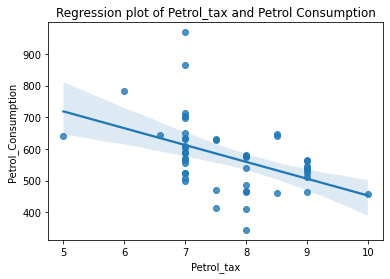

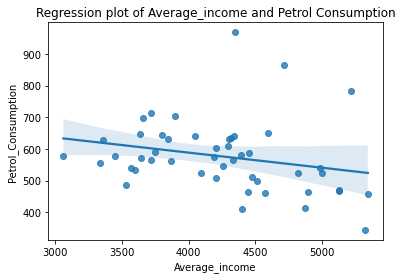

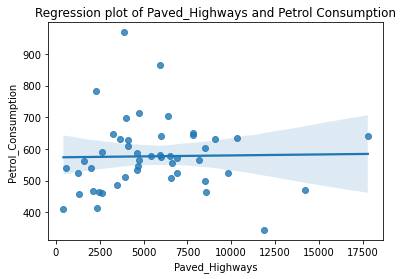

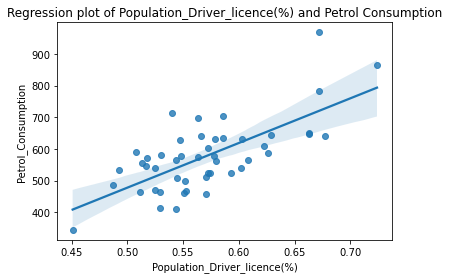

In [474]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

In [475]:
df.shape

(48, 5)

In [476]:
#Removing outliers data in Petrol_tax variable

print(df[(df['Petrol_tax'] > 9.50)])
print(df[(df['Petrol_tax'] < 6.50)])

df = df[~(df['Petrol_tax'] > 9.50)]
df = df[~(df['Petrol_tax'] < 6.50)]

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
5        10.0            5342            1333                         0.571   

   Petrol_Consumption  
5                 457  
    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
36         5.0            4045           17782                         0.566   
44         6.0            5215            2302                         0.672   

    Petrol_Consumption  
36                 640  
44                 782  


In [477]:
df.shape

(45, 5)

In [478]:
#Removing outliers data in Average_income variable

print(df[(df['Average_income'] < 3200)])
print(df[(df['Average_income'] > 5250)])

df = df[~(df['Average_income'] < 3200)]
df = df[~(df['Average_income'] > 5250)]

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
32         8.0            3063            6524                         0.578   

    Petrol_Consumption  
32                 577  
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
6         8.0            5319           11868                         0.451   

   Petrol_Consumption  
6                 344  


In [479]:
df.shape

(43, 5)

In [480]:
#Removing outliers data in Average_income variable

print(df[(df['Paved_Highways'] > 10000)])

df = df[~(df['Paved_Highways'] > 10000)]

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
11         7.5            5126           14186                         0.525   
15         7.0            4318           10340                         0.586   

    Petrol_Consumption  
11                 471  
15                 635  


In [481]:
df.shape

(41, 5)

In [482]:
#Removing outliers data in Average_income variable

print(df[(df['Population_Driver_licence(%)'] < 0.46)])
print(df[(df['Population_Driver_licence(%)'] > 0.68)])


df = df[~(df['Population_Driver_licence(%)'] < 0.46)]
df = df[~(df['Population_Driver_licence(%)'] > 0.68)]

Empty DataFrame
Columns: [Petrol_tax, Average_income, Paved_Highways, Population_Driver_licence(%), Petrol_Consumption]
Index: []
    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
18         7.0            4716            5915                         0.724   

    Petrol_Consumption  
18                 865  


In [483]:
df.shape

(40, 5)

In [484]:
#Removing outliers data in Petrol_Consumption variable

print(df[(df['Petrol_Consumption'] < 420)])
print(df[(df['Petrol_Consumption'] > 850)])


df = df[~(df['Petrol_Consumption'] < 420)]
df = df[~(df['Petrol_Consumption'] > 850)]

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
3                 414  
4                 410  
    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
39         7.0            4345            3905                         0.672   

    Petrol_Consumption  
39                 968  


In [485]:
df.shape

(37, 5)

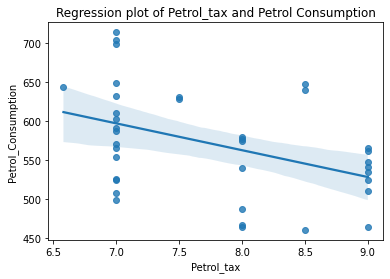

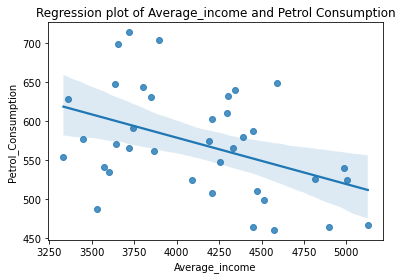

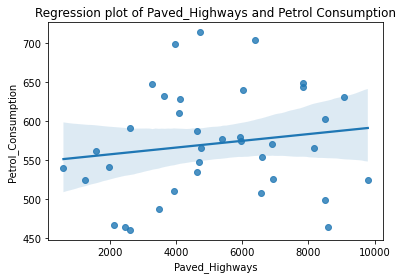

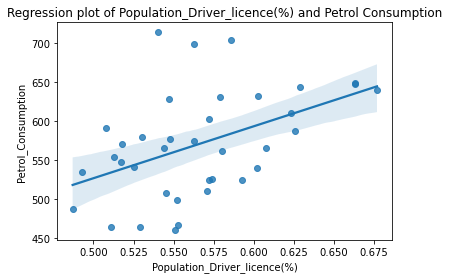

In [486]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

In [487]:
#Dataset for the model

y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [488]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [489]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [490]:
regressor.intercept_

726.6734241137171

In [491]:
#Better representaions of coef

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

print(coefficients_df)

                              Coefficient value
Average_income                        -0.088267
Paved_Highways                        -0.004327
Population_Driver_licence(%)         799.624794
Petrol_tax                           -28.135246


In [492]:
#Model predections

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
24     460  513.052137
20     649  620.569642
8      464  494.956518
38     648  682.658274
46     610  631.031145
33     628  638.910071
10     580  512.114196
34     487  564.480166


In [493]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 40.55
Mean squared error: 2119.41
Root mean squared error: 46.04


In [494]:
#Train Error
regressor.score(X_train, y_train)

0.6402956657405138

In [495]:
#Test Error
regressor.score(X_test, y_test)

0.6428166780884602

### By removing outliers we can get 64.02% train accuarcy and 64.28% testing accuracy.